## EDA

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')
df = pd.read_csv("data.csv", sep = ";")
pd.set_option('display.max_columns', None)
df.head()

,TM,GR,RFV,GR.1,H1RFV,GR.2,H2RFV,GR.3,CONICITY,GR.4,H1LFV,GR.5,PLY,GR.6,LFV,GR.7,RRO,GR.8,CAPSPLICE,GR.9,H1RRO,GR.10
0,1,B,75,A,45,A,22,A,6.7,A,4.5,A,50.4,A,8.4,A,1.12,B,0.33,A,0.68,A
1,1,A,46,A,14,A,23,A,4.5,A,4.3,A,56.0,A,13.0,A,0.77,A,0.17,A,0.17,A
2,1,A,35,A,19,A,6,A,6.4,A,13.7,A,52.8,A,16.7,A,0.60,A,0.26,A,0.19,A
3,1,A,34,A,12,A,2,A,8.0,A,4.8,A,49.5,A,11.5,A,0.50,A,0.33,A,0.20,A
4,1,B,42,A,33,A,13,A,11.8,B,4.6,A,51.6,A,8.0,A,0.56,A,0.15,A,0.41,A


In [3]:
df.groupby("GR").count()

,TM,RFV,GR.1,H1RFV,GR.2,H2RFV,GR.3,CONICITY,GR.4,H1LFV,GR.5,PLY,GR.6,LFV,GR.7,RRO,GR.8,CAPSPLICE,GR.9,H1RRO,GR.10
GR,,,,,,,,,,,,,,,,,,,,,
A,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
B,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
C,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
D,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
df = df.loc[(df['GR'])!="D"]

In [5]:
df = df[['GR', 'RFV','H1RFV','H2RFV','CONICITY',
       'H1LFV', 'PLY','LFV','RRO', 'CAPSPLICE', 'H1RRO']]

X = df.drop([
'GR'
], axis=1)

In [6]:
X_all = X
y_all = df['GR']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25 , stratify=y_all, random_state = 7265)

print('Numero de observaçoes do treino:', len(X_train))
print('Numero de observaçoes da teste:',len(X_test))

Numero de observaçoes do treino: 80
Numero de observaçoes da teste: 27


In [7]:
train = X_train.copy()
train['GR'] = y_train

test = X_test.copy()
test['GR'] = y_test

In [8]:
X_train.to_csv("X_train.csv", sep = ";", index=False)
X_test.to_csv("X_test.csv", sep = ";", index=False)
y_test.to_csv("y_test.csv", sep = ";", index=False)
y_train.to_csv("y_train.csv", sep = ";", index=False)

In [9]:
print(Counter(y_train).keys())
print(Counter(y_train).values())

print(Counter(y_test).keys())
print(Counter(y_test).values())

dict_keys(['B', 'A', 'C'])
dict_values([35, 34, 11])
dict_keys(['B', 'A', 'C'])
dict_values([11, 12, 4])


In [10]:
X_train.describe()

,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,57.325000,32.862500,18.250000,8.963750,8.292500,50.502500,12.76000,0.842125,0.299250,0.418500
std,16.936796,15.909351,9.058879,1.973447,3.398018,2.815642,3.32191,0.249621,0.122875,0.222597
min,32.000000,9.000000,2.000000,4.500000,2.200000,40.400000,7.00000,0.420000,0.150000,0.010000
25%,44.750000,21.000000,11.750000,7.450000,6.125000,49.300000,10.30000,0.650000,0.220000,0.230000
50%,55.000000,30.000000,18.000000,8.950000,7.750000,50.550000,12.40000,0.820000,0.265000,0.400000
75%,66.250000,44.250000,23.000000,10.425000,9.900000,52.225000,14.80000,1.002500,0.330000,0.552500
max,117.000000,81.000000,46.000000,13.000000,18.100000,56.800000,21.90000,1.490000,0.750000,1.070000


In [11]:
data = X_train.copy()
data['GR'] = y_train
data.head(2)

,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO,GR
42,63,34,27,10.3,8.3,48.7,11.5,1.19,0.46,0.52,B
20,55,38,7,9.7,9.9,49.8,15.1,0.80,0.26,0.40,A


In [12]:
data.groupby("GR").describe()

RFV                                                       H1RFV  \
   count       mean        std   min    25%   50%   75%    max count   
GR                                                                     
A   34.0  47.941176   9.319062  33.0  40.25  49.0  55.0   67.0  34.0   
B   35.0  60.257143  14.424943  32.0  49.00  63.0  69.0   86.0  35.0   
C   11.0  77.000000  22.733236  44.0  61.50  80.0  88.5  117.0  11.0   

                                                        H2RFV             \
         mean        std   min    25%   50%   75%   max count       mean   
GR                                                                         
A   25.970588   8.901771  12.0  19.25  25.0  32.0  44.0  34.0  14.352941   
B   35.371429  14.884034   9.0  23.00  34.0  48.5  55.0  35.0  20.028571   
C   46.181818  24.620391  12.0  25.50  48.0  65.0  81.0  11.0  24.636364   

                                             CONICITY                       \
          std  min    25%   50%    75%   max    count       mean       std   
GR                                                                           
A    7.401402  2.0   7.25  15.0  21.75  25.0     34.0   7.511765  1.490325   
B    7.540033  7.0  15.00  19.0  27.00  34.0     35.0   9.720000  1.427833   
C   12.909475  6.0  15.50  22.0  34.50  46.0     11.0  11.045455  1.602725   

                                    H1LFV                                  \
    min     25%   50%     75%   max count      mean       std  min    25%   
GR                                                                          
A   4.5   6.625   7.7   8.475   9.9  34.0  7.782353  2.846632  4.0  5.975   
B   6.7   8.750  10.2  10.850  11.6  35.0  8.737143  3.657956  2.2  6.350   
C   8.1  10.050  10.9  12.300  13.0  11.0  8.454545  4.168540  3.3  6.700   

                        PLY                                                   \
     50%    75%   max count       mean       std   min     25%   50%     75%   
GR                                                                             
A   7.25   8.95  15.8  34.0  51.214706  3.239728  40.4  49.575  51.6  53.375   
B   8.60  11.25  17.3  35.0  49.705714  2.569269  42.4  48.500  50.0  50.850   
C   7.90   8.85  18.1  11.0  50.836364  1.216777  48.5  49.900  51.0  51.750   

           LFV                                                         RRO  \
     max count       mean       std  min    25%    50%     75%   max count   
GR                                                                           
A   56.8  34.0  12.673529  2.916028  8.6  10.50  12.05  14.875  19.0  34.0   
B   53.8  35.0  12.945714  3.484701  7.7  10.60  13.10  14.700  21.9  35.0   
C   52.3  11.0  12.436364  4.191485  7.0   9.45  12.10  14.050  20.9  11.0   

                                                        CAPSPLICE            \
        mean       std   min    25%   50%     75%   max     count      mean   
GR                                                                            
A   0.694412  0.133057  0.42  0.620  0.69  0.7775  0.97      34.0  0.270294   
B   0.888286  0.207839  0.46  0.770  0.92  1.0500  1.19      35.0  0.294571   
C   1.151818  0.315937  0.62  0.895  1.24  1.4100  1.49      11.0  0.403636   

                                               H1RRO                      \
         std   min    25%    50%     75%   max count      mean       std   
GR                                                                         
A   0.066126  0.17  0.220  0.255  0.3175  0.42  34.0  0.306765  0.132613   
B   0.117005  0.15  0.215  0.270  0.3300  0.64  35.0  0.454000  0.197636   
C   0.208292  0.20  0.240  0.310  0.5550  0.75  11.0  0.650909  0.307130   

                                     
     min    25%   50%     75%   max  
GR                                   
A   0.10  0.185  0.31  0.4275  0.61  
B   0.01  0.305  0.46  0.6100  0.80  
C   0.19  0.365  0.70  0.9150  1.07

<AxesSubplot:ylabel='GR'>

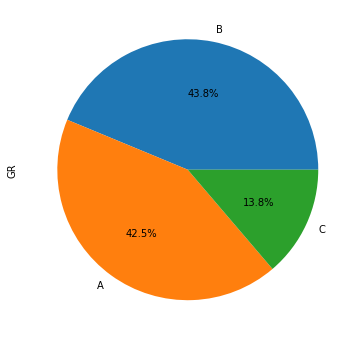

In [13]:
plt.figure(figsize=(6,6))
data['GR'].value_counts().plot.pie(autopct="%1.1f%%")

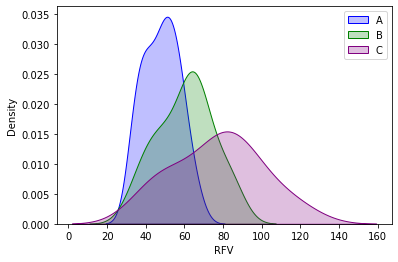

In [14]:
g = sns.kdeplot(data["RFV"][(data["GR"] == "A") & (data["RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["RFV"][(data["GR"] == "B") & (data["RFV"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["RFV"][(data["GR"] == "C") & (data["RFV"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("RFV")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

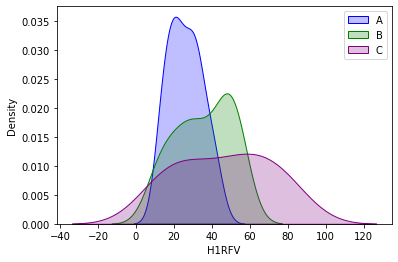

In [15]:
g = sns.kdeplot(data["H1RFV"][(data["GR"] == "A") & (data["H1RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["H1RFV"][(data["GR"] == "B") & (data["H1RFV"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["H1RFV"][(data["GR"] == "C") & (data["H1RFV"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("H1RFV")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

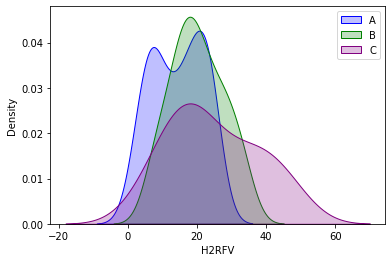

In [16]:
g = sns.kdeplot(data["H2RFV"][(data["GR"] == "A") & (data["H2RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["H2RFV"][(data["GR"] == "B") & (data["H2RFV"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["H2RFV"][(data["GR"] == "C") & (data["H2RFV"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("H2RFV")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

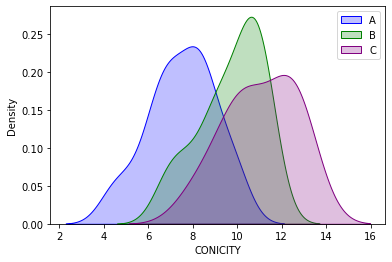

In [17]:
g = sns.kdeplot(data["CONICITY"][(data["GR"] == "A") & (data["CONICITY"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["CONICITY"][(data["GR"] == "B") & (data["CONICITY"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["CONICITY"][(data["GR"] == "C") & (data["CONICITY"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("CONICITY")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

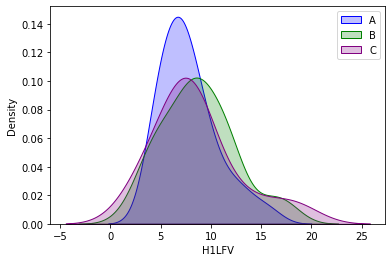

In [18]:
g = sns.kdeplot(data["H1LFV"][(data["GR"] == "A") & (data["H1LFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["H1LFV"][(data["GR"] == "B") & (data["H1LFV"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["H1LFV"][(data["GR"] == "C") & (data["H1LFV"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("H1LFV")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

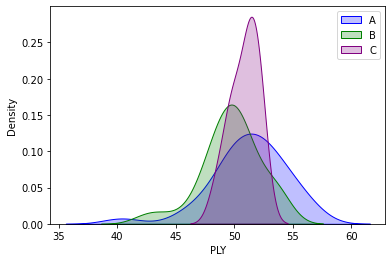

In [19]:
g = sns.kdeplot(data["PLY"][(data["GR"] == "A") & (data["PLY"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["PLY"][(data["GR"] == "B") & (data["PLY"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["PLY"][(data["GR"] == "C") & (data["PLY"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("PLY")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

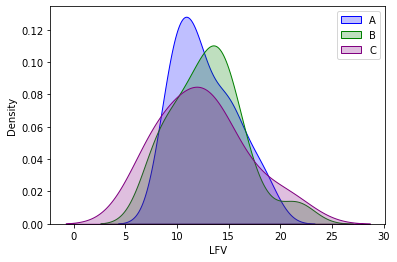

In [20]:
g = sns.kdeplot(data["LFV"][(data["GR"] == "A") & (data["LFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["LFV"][(data["GR"] == "B") & (data["LFV"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["LFV"][(data["GR"] == "C") & (data["LFV"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("LFV")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

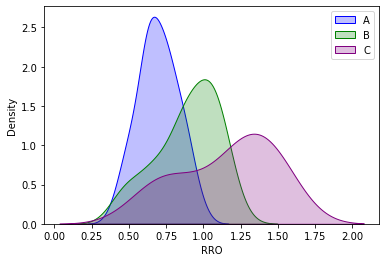

In [21]:
g = sns.kdeplot(data["RRO"][(data["GR"] == "A") & (data["RRO"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["RRO"][(data["GR"] == "B") & (data["RRO"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["RRO"][(data["GR"] == "C") & (data["RRO"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("RRO")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

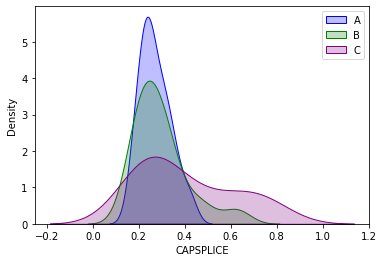

In [22]:
g = sns.kdeplot(data["CAPSPLICE"][(data["GR"] == "A") & (data["CAPSPLICE"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["CAPSPLICE"][(data["GR"] == "B") & (data["CAPSPLICE"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["CAPSPLICE"][(data["GR"] == "C") & (data["CAPSPLICE"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("CAPSPLICE")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

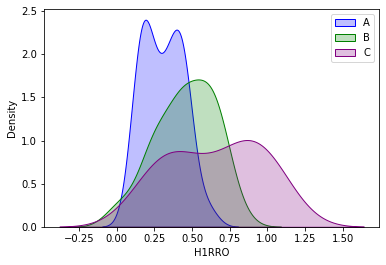

In [23]:
g = sns.kdeplot(data["H1RRO"][(data["GR"] == "A") & (data["H1RRO"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["H1RRO"][(data["GR"] == "B") & (data["H1RRO"].notnull())], ax =g, color="Green", shade= True)
g = sns.kdeplot(data["H1RRO"][(data["GR"] == "C") & (data["H1RRO"].notnull())], ax =g, color="Purple", shade= True)
g.set_xlabel("H1RRO")
g.set_ylabel("Density")
g = g.legend(["A","B", "C"])

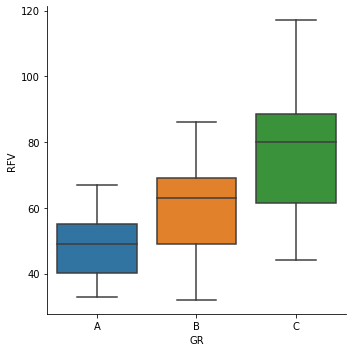

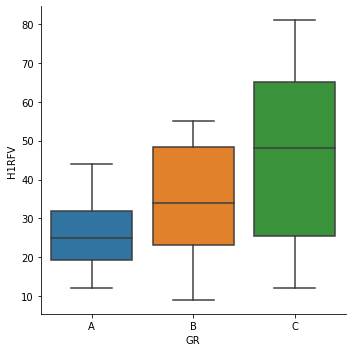

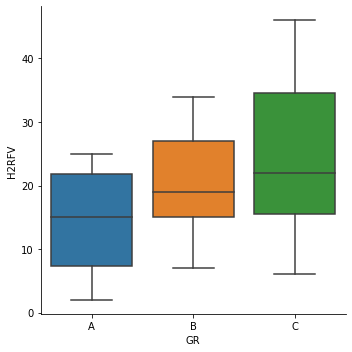

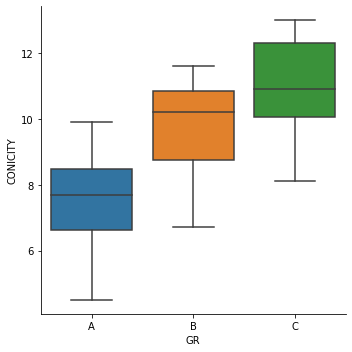

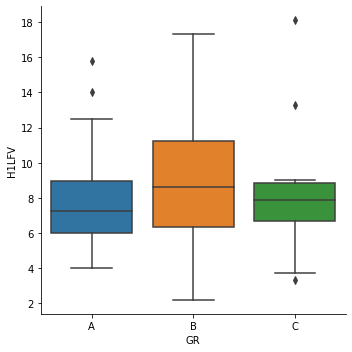

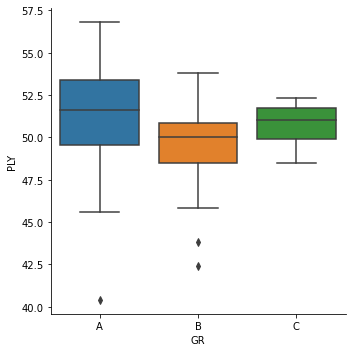

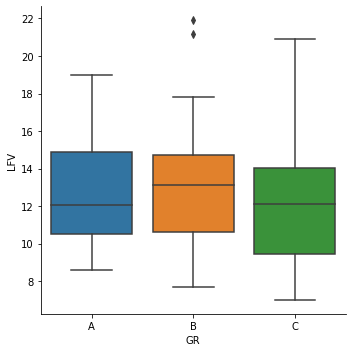

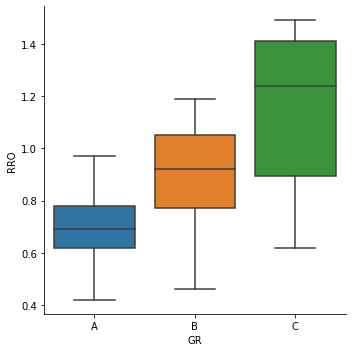

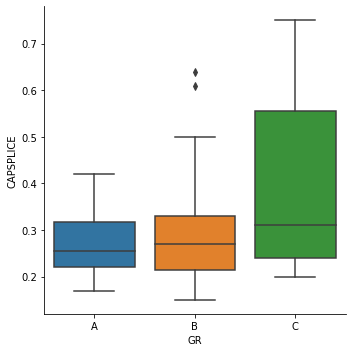

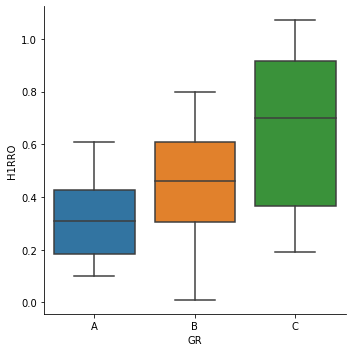

In [24]:
warnings.filterwarnings('ignore')
orders = ["A", "B", "C"]
g = sns.factorplot(y="RFV",x="GR",data=data,kind="box", order = orders)
g = sns.factorplot(y="H1RFV",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="H2RFV",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="CONICITY",x="GR",data=data,kind="box", order = orders)
g = sns.factorplot(y="H1LFV",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="PLY",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="LFV",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="RRO",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="CAPSPLICE",x="GR", data=data,kind="box", order = orders)
g = sns.factorplot(y="H1RRO",x="GR", data=data,kind="box", order = orders)

Correlations

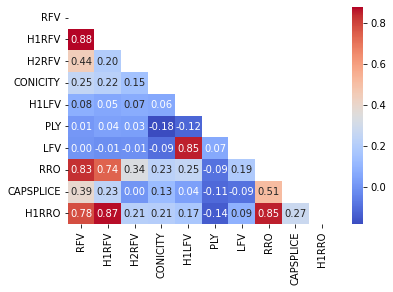

In [28]:
corrmat = np.triu(data.corr(method='pearson'))

data_cor = data[['RFV','H1RFV','H2RFV','CONICITY',
       'H1LFV', 'PLY','LFV','RRO', 'CAPSPLICE', 'H1RRO']]

g = sns.heatmap(data_cor.corr(method='pearson'),cmap="coolwarm",annot=True, mask = corrmat, fmt=".2f")

In [26]:
data_cor.corr(method='pearson')

,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO
RFV,1.000000,0.877002,0.443575,0.251674,0.080851,0.011874,0.003924,0.827603,0.389761,0.778006
H1RFV,0.877002,1.000000,0.195840,0.216385,0.054795,0.042282,-0.013039,0.737548,0.232474,0.866656
H2RFV,0.443575,0.195840,1.000000,0.151685,0.072395,0.030943,-0.007782,0.339661,0.004264,0.214812
CONICITY,0.251674,0.216385,0.151685,1.000000,0.062572,-0.180727,-0.094433,0.227389,0.128251,0.205762
H1LFV,0.080851,0.054795,0.072395,0.062572,1.000000,-0.118171,0.850463,0.251268,0.037276,0.173628
PLY,0.011874,0.042282,0.030943,-0.180727,-0.118171,1.000000,0.066392,-0.088581,-0.109904,-0.141511
LFV,0.003924,-0.013039,-0.007782,-0.094433,0.850463,0.066392,1.000000,0.187393,-0.086597,0.090851
RRO,0.827603,0.737548,0.339661,0.227389,0.251268,-0.088581,0.187393,1.000000,0.511713,0.848944
CAPSPLICE,0.389761,0.232474,0.004264,0.128251,0.037276,-0.109904,-0.086597,0.511713,1.000000,0.274351
H1RRO,0.778006,0.866656,0.214812,0.205762,0.173628,-0.141511,0.090851,0.848944,0.274351,1.000000


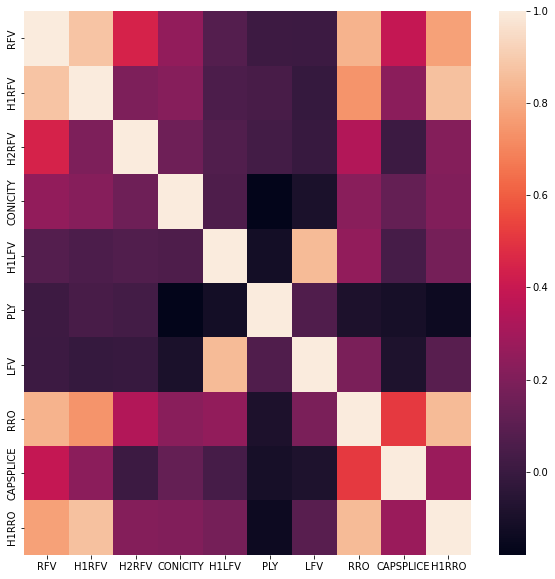

In [25]:
top_num_features = data_cor.columns.to_list()
corrmat = data[top_num_features].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

### Mutual information

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [ ]:
selector = SelectKBest(mutual_info_classif, k=7)
X_reduced = selector.fit_transform(X_train, y_train)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns

In [ ]:
threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X_train, y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_wine_norm_mic = X_train[high_score_features]
print(df_wine_norm_mic.columns)

ANOVA F-Statistic

In [26]:
F_statistic, p_values = f_classif(data_cor, y_train)
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': data_cor.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,CONICITY,31.881453,1.000000e-10
1,RRO,23.614583,1.010000e-08
2,RFV,19.246682,1.665000e-07
3,H1RRO,14.347947,5.054200e-06
4,H1RFV,8.994404,3.086769e-04
5,H2RFV,7.659146,9.253673e-04
6,CAPSPLICE,5.501705,5.843351e-03
7,PLY,2.675280,7.528879e-02
8,H1LFV,0.689862,5.047184e-01
9,LFV,0.115767,8.908371e-01


In [27]:
def Scatterplot(data, var1, var2, cat):

    fig = px.scatter(data, x = var1, y = var2, color =cat, width = 800)
    fig.update_traces(marker=dict(size = 12,line = dict(width = 1)),selector=dict(mode = 'markers'))
    fig.update_layout(title = 'Scatterplot: ' + var1 + " vs " + var2)
    fig.update_xaxes(title = var1)
    fig.update_yaxes(title = var2)
    fig.show()

In [28]:
Scatterplot(data, "RFV", "PLY",  "GR")

In [29]:
Scatterplot(data, "H1RFV", "CONICITY",  "GR")

In [30]:
Scatterplot(data, "H1RFV", "H2RFV",  "GR")

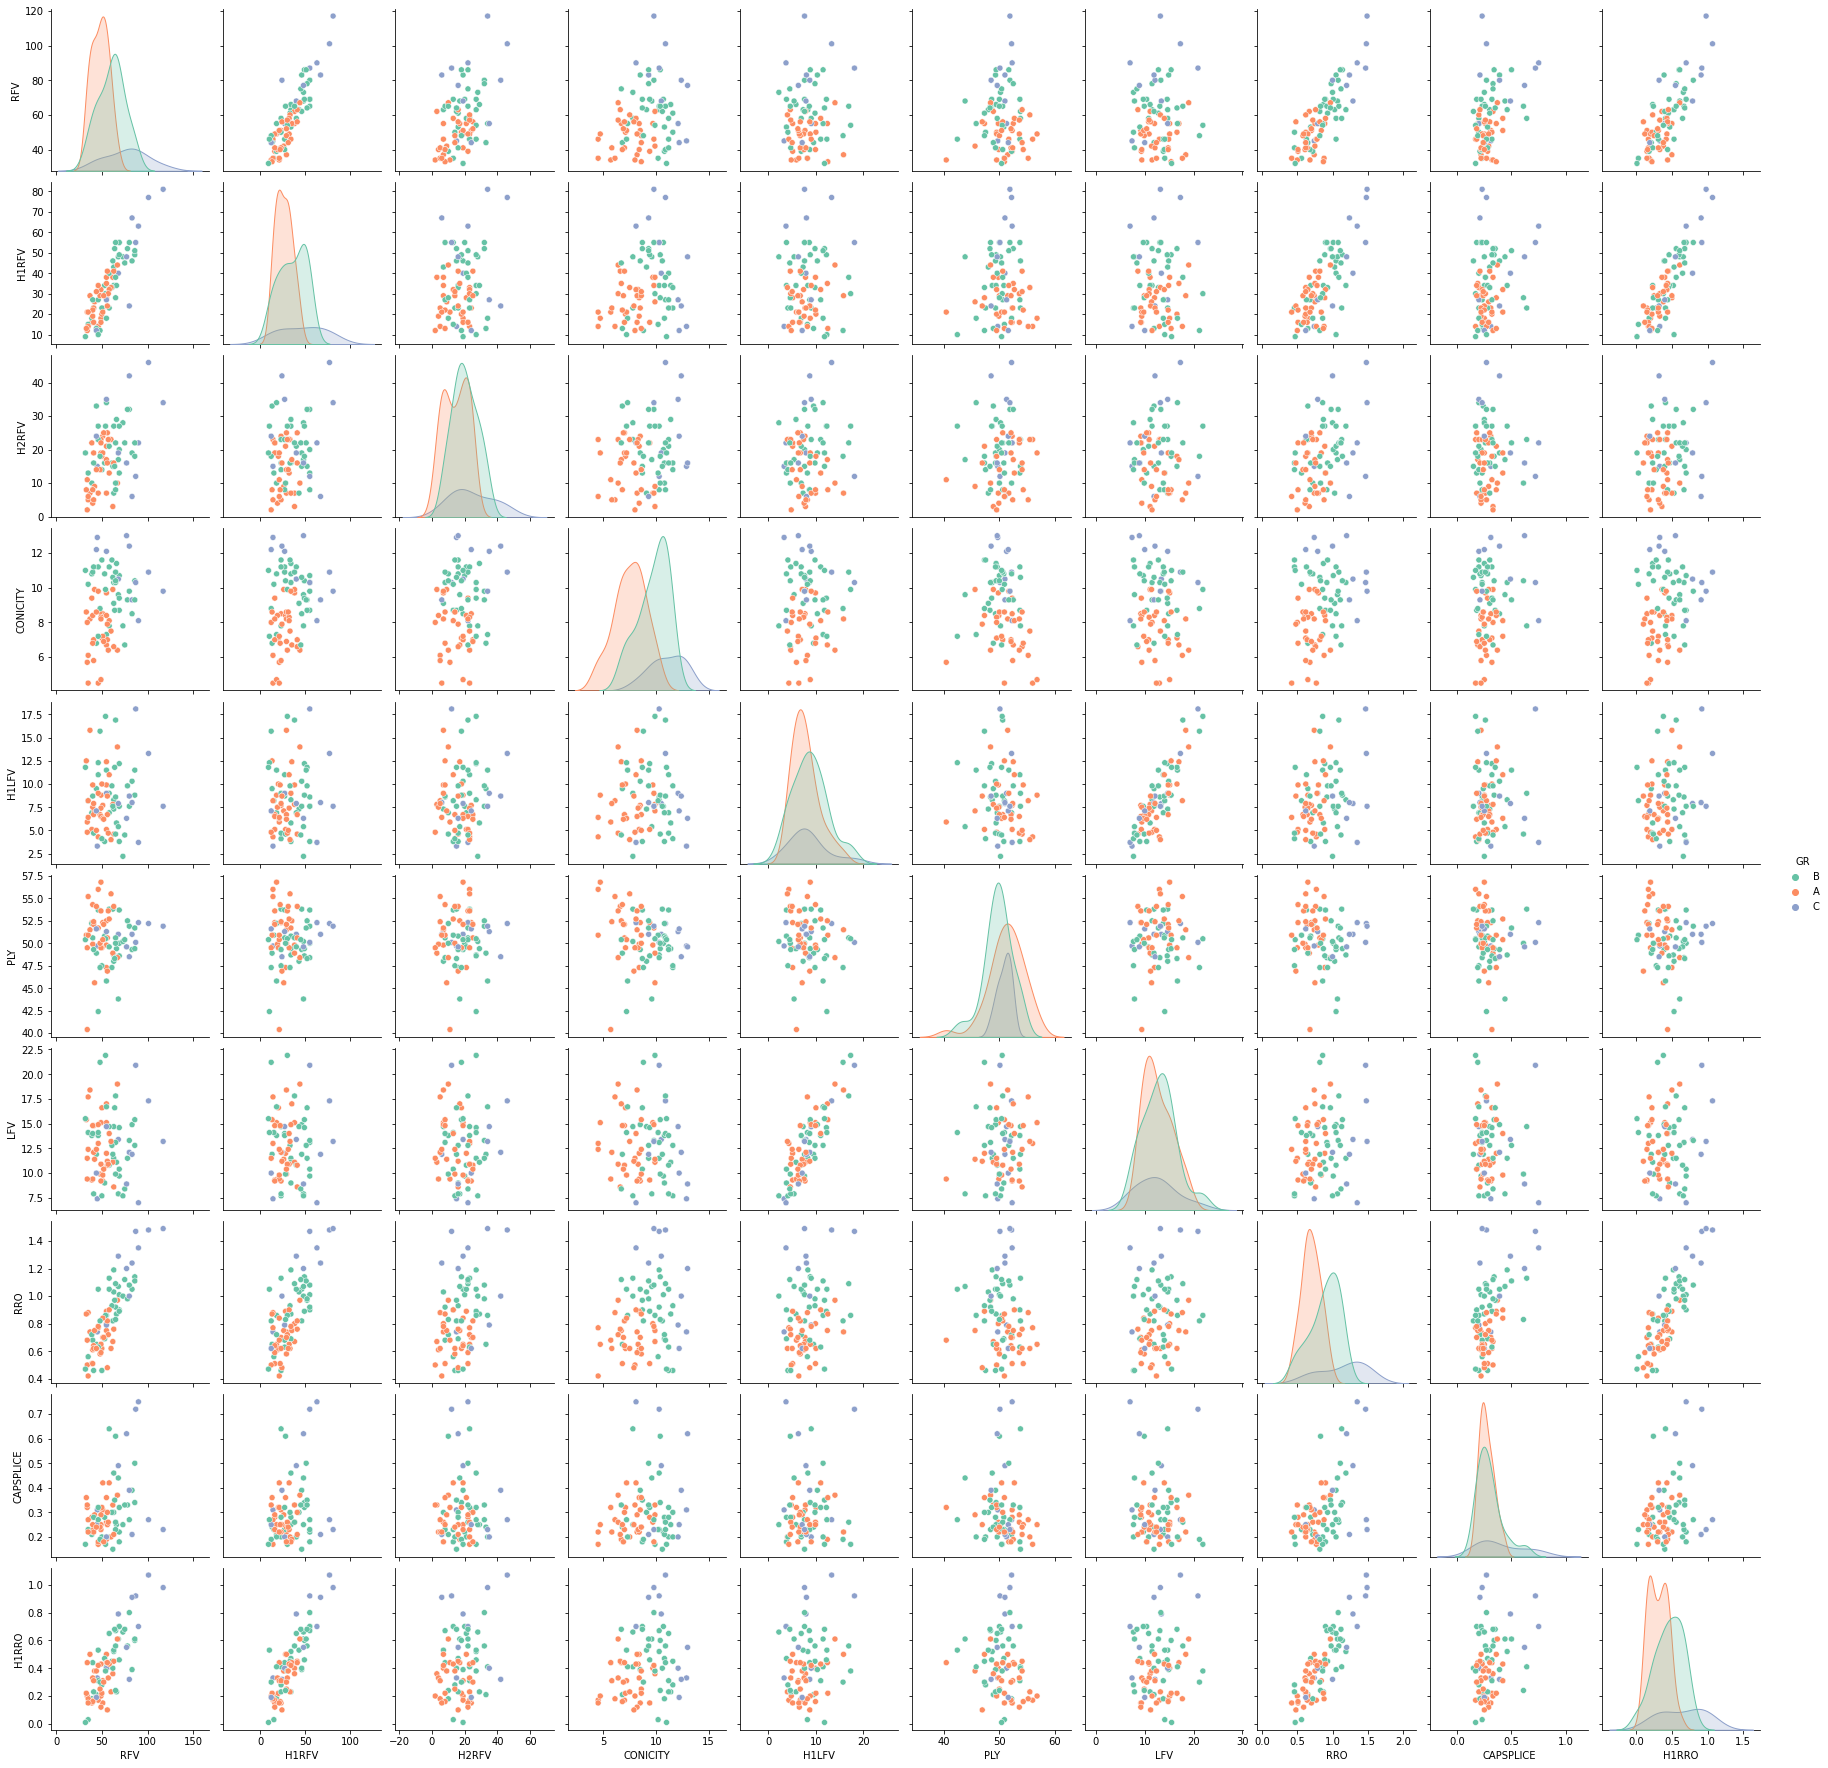

In [31]:
g = sns.pairplot(data, hue="GR", palette="Set2", diag_kind="kde", height=2.5)

In [32]:
fig = px.scatter_3d(data, x="H1RFV", y="CONICITY",z="RFV",
                    color= "GR")

fig.show()